# 傅里叶变换
频域<->时域  
1. 对于正弦信号，如果幅度在短时间内变化如此之快，则可以说它是高频信号。如果变化缓慢，则为低频信号。
2. 图像中的振幅在边缘点或噪声急剧变化。因此，可以说边缘和噪声是图像中的高频内容。如果幅度没有太大变化，则它是低频分量。

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import _tools
img = cv.imread('../data/messi5.jpg',0)
img = _tools.AddGaussNoise(img,0)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# 读取灰度图像
img = cv.imread('../data/messi5.jpg', 0)

# 获取图像的行数和列数
rows, cols = img.shape

# 计算图像中心点的坐标
crow, ccol = rows // 2, cols // 2

# 进行二维离散傅里叶变换
f = np.fft.fft2(img)

# 将频谱转移到中心
fshift = np.fft.fftshift(f)

# 在频域中设置中心方形区域的值为零（高通滤波）
fshift[crow-30:crow+31, ccol-30:ccol+31] = 0

# 将频谱转移回原始位置
f_ishift = np.fft.ifftshift(fshift)

# 进行逆向二维离散傅里叶变换
img_back = np.fft.ifft2(f_ishift)

# 提取逆变换结果的实部
img_back = np.real(img_back)

#显示图像及结果
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()

# img_total = np.concatenate((img, img_back, img_back), axis=1)
# cv.imshow('img_total',img_total)
# cv.waitKey(0)
# cv.destroyAllWindows()



In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('../data/messi5.jpg',0)
dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('../data/messi5.jpg', 0)

dft = cv.dft(np.float32(img), flags=cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log(cv.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

rows, cols = img.shape
crow, ccol = rows // 2, cols // 2  # Use integer division instead of floating-point division

# 首先创建一个掩码，中心正方形为1，其余全为零
mask = np.zeros_like(dft_shift)
mask[crow - 30:crow + 30, ccol - 30:ccol + 30] = 1

# 应用掩码和逆DFT
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:, :, 0], img_back[:, :, 1])

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_back, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


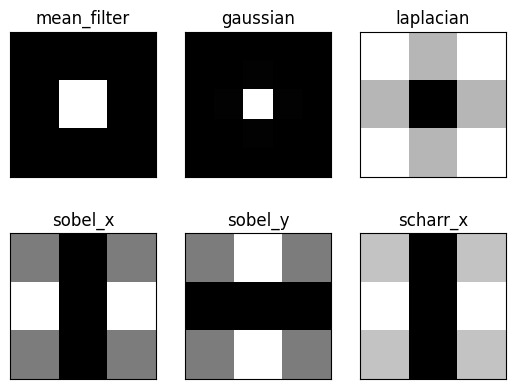

In [63]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
# 没有缩放参数的简单均值滤波器
mean_filter = np.ones((3,3))
# 创建高斯滤波器
x = cv.getGaussianKernel(5,10)
gaussian = x*x.T
# 不同的边缘检测滤波器
# x方向上的scharr
scharr = np.array([[-3, 0, 3],
                   [-10,0,10],
                   [-3, 0, 3]])
# x方向上的sobel
sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
# y方向上的sobel
sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])
# 拉普拉斯变换
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])
filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ['mean_filter', 'gaussian','laplacian', 'sobel_x', \
                'sobel_y', 'scharr_x']
fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(mag_spectrum[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])
plt.show()